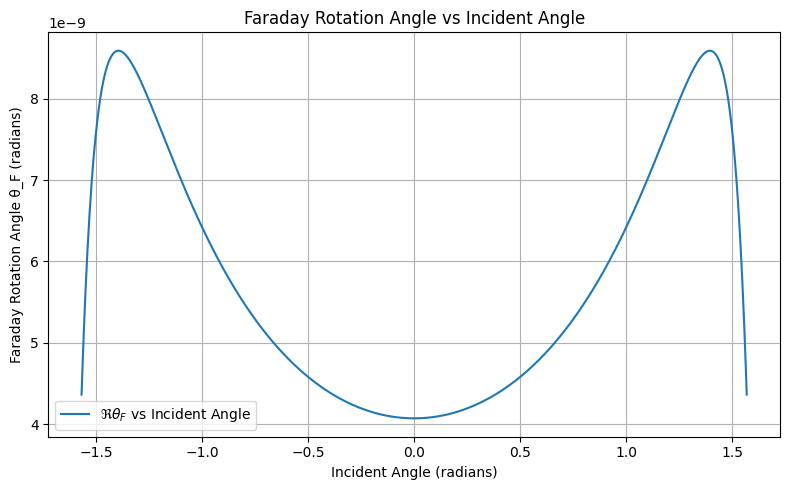

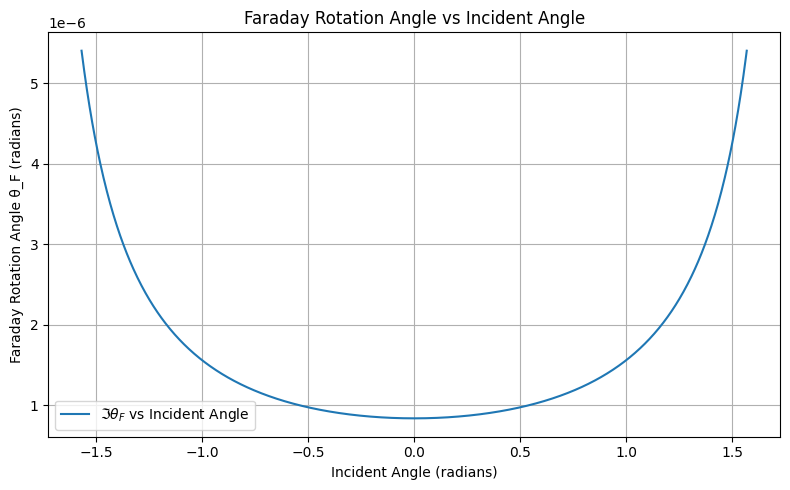

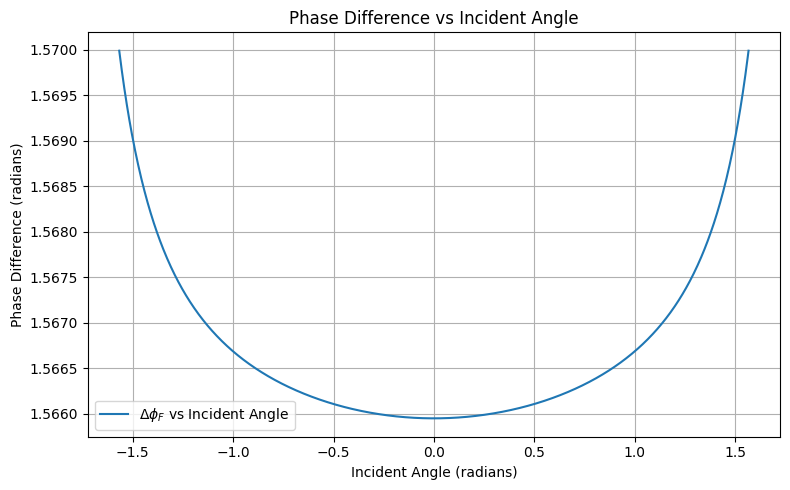

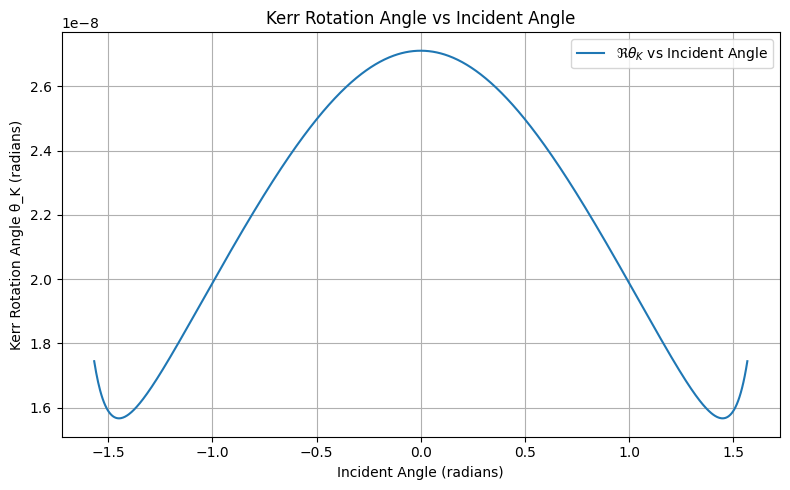

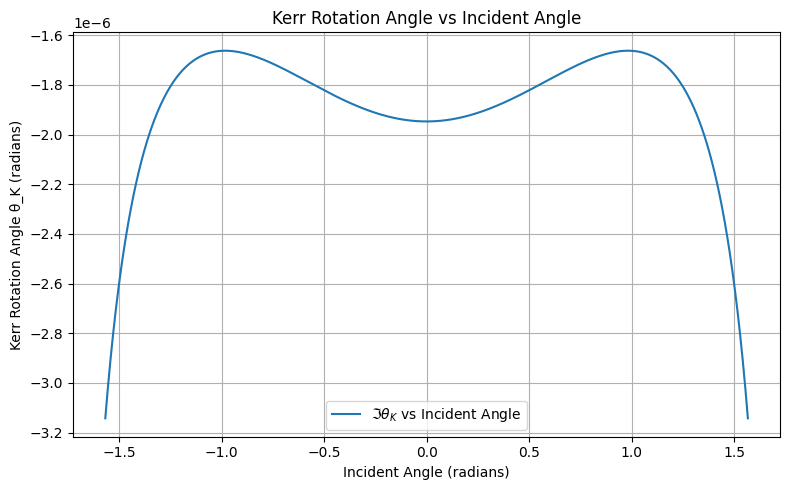

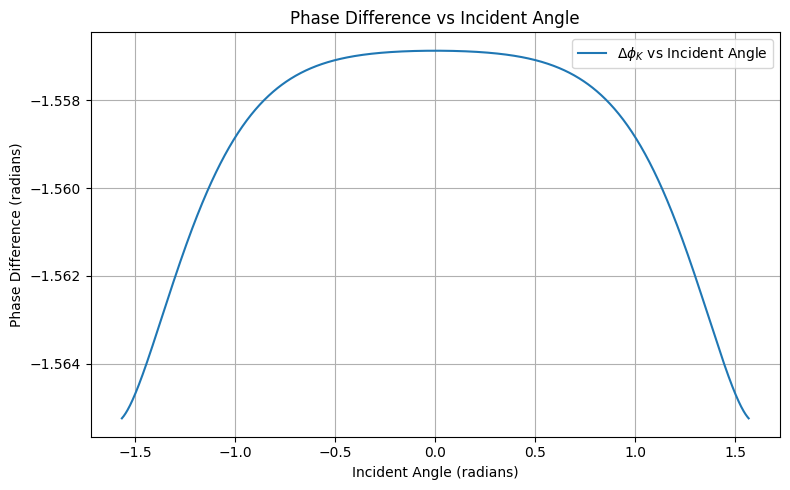

In [4]:
# This is the relation of rotation and incident angle.
import numpy as np
import matplotlib.pyplot as plt

k0 = 2 * np.pi * 1e4 / 3  # The frequency is 1THz.
n1 = 3.46
n2 = 10.0
n3 = 1.0
d = 1e-8
a = 7.29735e-3
sigma_xy_b = -0.5
sigma_xy_t = 0.5
sigma_xx_b = 0.5
sigma_xx_t = 0.5

theta_range = np.linspace(-np.pi * 0.499, np.pi * 0.499, 1000)
theta_F_real_list = []
theta_F_imag_list = []
phase_diff_f_list = []
theta_K_real_list = []
theta_K_imag_list = []
phase_diff_k_list = []

for theta in theta_range:
    x1 = np.sqrt(n1**2 - n3**2 * np.sin(theta)**2) / n1
    x2 = np.sqrt(n2**2 - n3**2 * np.sin(theta)**2) / n2
    x3 = np.cos(theta)
    x4 = 2 * a * sigma_xx_b
    x5 = 2 * a * sigma_xy_b
    x6 = 2 * a * sigma_xy_t
    x7 = (n1 * x2 + n2 * x1 + x4 * x1 * x2) * (n1 * x1 + n2 * x2 + x4) + x5**2 * x1 * x2
    x9 = 2 * a * sigma_xx_t
    x8 = (n2 * x3 + n3 * x2 + x9 * x2 * x3) * (n2 * x2 + n3 * x3 + x9) + x6**2 * x2 * x3

    T12 = np.array([
        [2 * n1 * x1 * (n1 * x2 + n2 * x1 + x4 * x1 * x2) / x7, -2 * n1 * x2 * x5 / x7],
        [2 * n1 * x1**2 * x2 * x5 / x7, 2 * n1 * x2 * (n1 * x1 + n2 * x2 + x4) / x7]
    ])

    T21 = np.array([
        [2 * n2 * x2 * (n2 * x1 + n1 * x2 + x4 * x1 * x2) / x7, -2 * n2 * x1 * x5 / x7],
        [2 * n2 * x2**2 * x1 * x5 / x7, 2 * n2 * x1 * (n2 * x2 + n1 * x1 + x4) / x7]
    ])

    R12 = np.array([
        [2 * n1 * x1 * (n1 * x2 + n2 * x1 + x4 * x1 * x2) / x7 - 1, -2 * n1 * x2 * x5 / x7],
        [2 * n1 * x1**2 * x2 * x5 / x7, 2 * n1 * x2 * (n1 * x1 + n2 * x2 + x4) / x7 - 1]
    ])

    R21 = np.array([
        [2 * n2 * x2 * (n2 * x1 + n1 * x2 + x4 * x1 * x2) / x7 - 1, -2 * n2 * x1 * x5 / x7],
        [2 * n2 * x2**2 * x1 * x5 / x7, 2 * n2 * x1 * (n2 * x2 + n1 * x1 + x4) / x7 - 1]
    ])

    T23 = np.array([
        [2 * n2 * x2 * (n2 * x3 + n3 * x2 + x9 * x2 * x3) / x8, -2 * n2 * x3 * x6 / x8],
        [2 * n2 * x2**2 * x3 * x6 / x8, 2 * n2 * x3 * (n2 * x2 + n3 * x3 + x9) / x8]
    ])

    R23 = np.array([
        [2 * n2 * x2 * (n2 * x3 + n3 * x2 + x9 * x2 * x3) / x8 - 1, -2 * n2 * x3 * x6 / x8],
        [2 * n2 * x2**2 * x3 * x6 / x8, 2 * n2 * x3 * (n2 * x2 + n3 * x3 + x9) / x8 - 1]
    ])

    delta = k0 * d * x2 * n2
    exp_2idelta = np.exp(-2j * delta)

    E_incident = np.array([1.0, 0.0 * x1])
    I = np.eye(2)
    inverse_term = np.linalg.inv(I - exp_2idelta * R21 @ R23)
    E_f = T23 @ inverse_term @ T12 @ E_incident
    E_k = (R12 + T21 @ R23 @ (exp_2idelta * inverse_term) @ T12) @ E_incident

    theta_F_real = np.arctan(E_f[1] / (E_f[0] * x3)).real
    theta_F_imag = np.arctan(E_f[1] / (E_f[0] * x3)).imag
    phase_diff_f = np.arctan((E_f[1] / (E_f[0] * x3)).imag / (E_f[1] / (E_f[0] * x3)).real)
    theta_F_real_list.append(theta_F_real)
    theta_F_imag_list.append(theta_F_imag)
    phase_diff_f_list.append(phase_diff_f)
    theta_K_real = np.arctan(E_k[1] / (E_k[0] * x1)).real
    theta_K_imag = np.arctan(E_k[1] / (E_k[0] * x1)).imag
    phase_diff_k = np.arctan((E_k[1] / (E_k[0] * x1)).imag / (E_k[1] / (E_k[0] * x1)).real)
    theta_K_real_list.append(theta_K_real)
    theta_K_imag_list.append(theta_K_imag)
    phase_diff_k_list.append(phase_diff_k)

plt.figure(figsize=(8, 5))
plt.plot(theta_range, theta_F_real_list, label=r'$\Re\theta_F$ vs Incident Angle')
plt.xlabel("Incident Angle (radians)")
plt.ylabel("Faraday Rotation Angle θ_F (radians)")
plt.title("Faraday Rotation Angle vs Incident Angle")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(theta_range, theta_F_imag_list, label=r'$\Im\theta_F$ vs Incident Angle')
plt.xlabel("Incident Angle (radians)")
plt.ylabel("Faraday Rotation Angle θ_F (radians)")
plt.title("Faraday Rotation Angle vs Incident Angle")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(theta_range, phase_diff_f_list, label=r'$\Delta\phi_F$ vs Incident Angle')
plt.xlabel("Incident Angle (radians)")
plt.ylabel("Phase Difference (radians)")
plt.title("Phase Difference vs Incident Angle")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(theta_range, theta_K_real_list, label=r'$\Re\theta_K$ vs Incident Angle')
plt.xlabel("Incident Angle (radians)")
plt.ylabel("Kerr Rotation Angle θ_K (radians)")
plt.title("Kerr Rotation Angle vs Incident Angle")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(theta_range, theta_K_imag_list, label=r'$\Im\theta_K$ vs Incident Angle')
plt.xlabel("Incident Angle (radians)")
plt.ylabel("Kerr Rotation Angle θ_K (radians)")
plt.title("Kerr Rotation Angle vs Incident Angle")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(theta_range, phase_diff_k_list, label=r'$\Delta\phi_K$ vs Incident Angle')
plt.xlabel("Incident Angle (radians)")
plt.ylabel("Phase Difference (radians)")
plt.title("Phase Difference vs Incident Angle")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

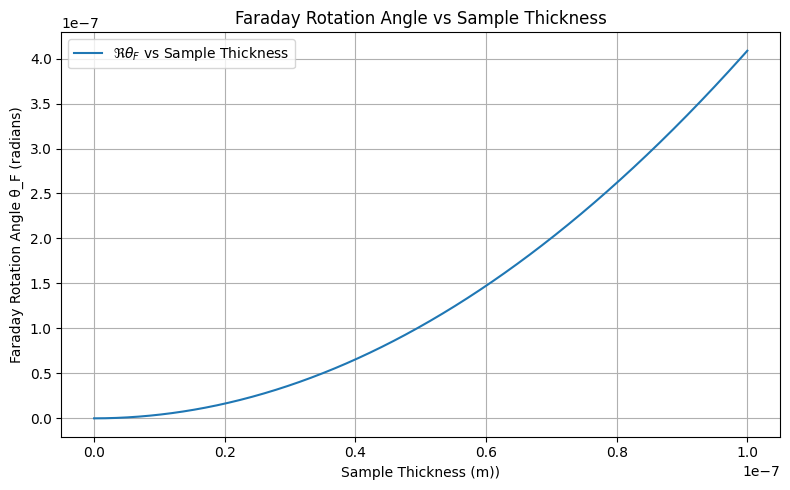

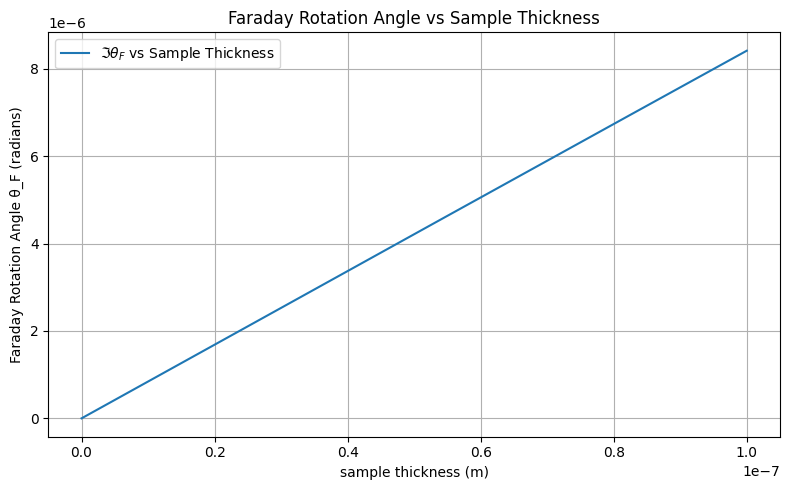

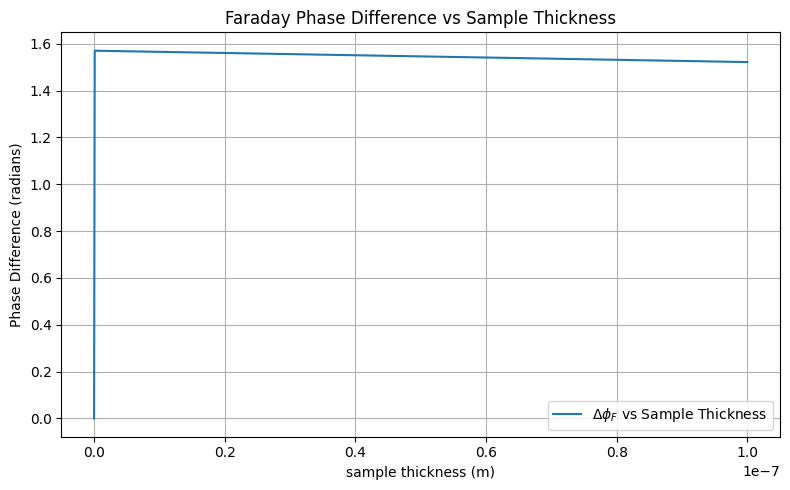

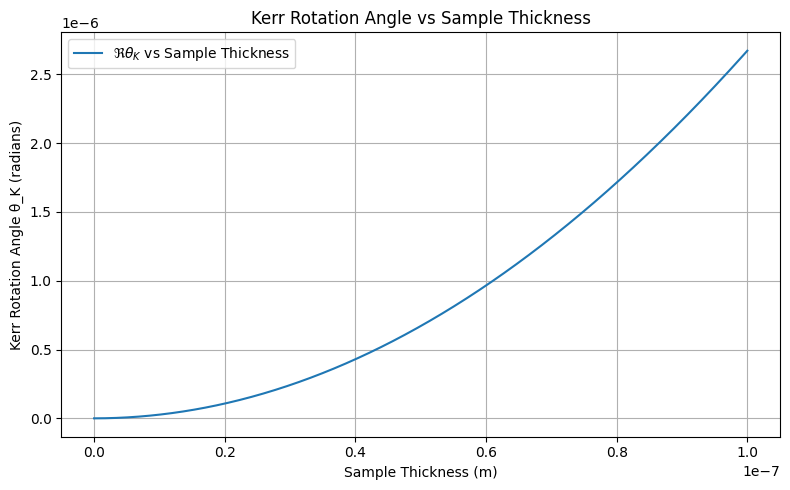

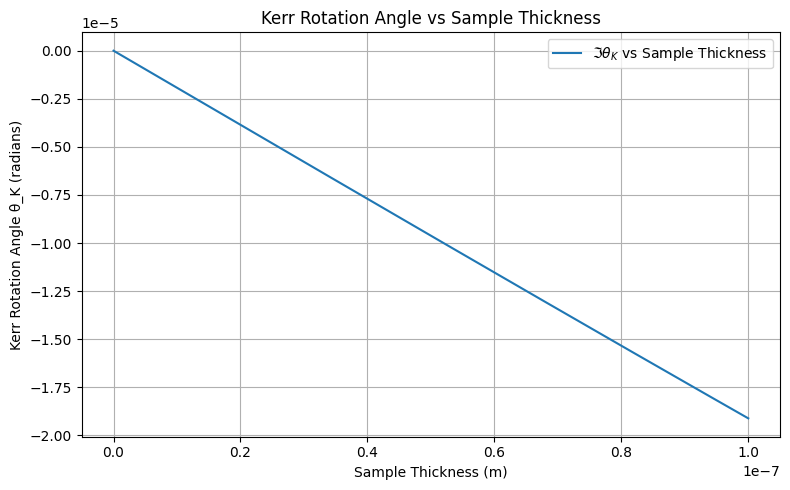

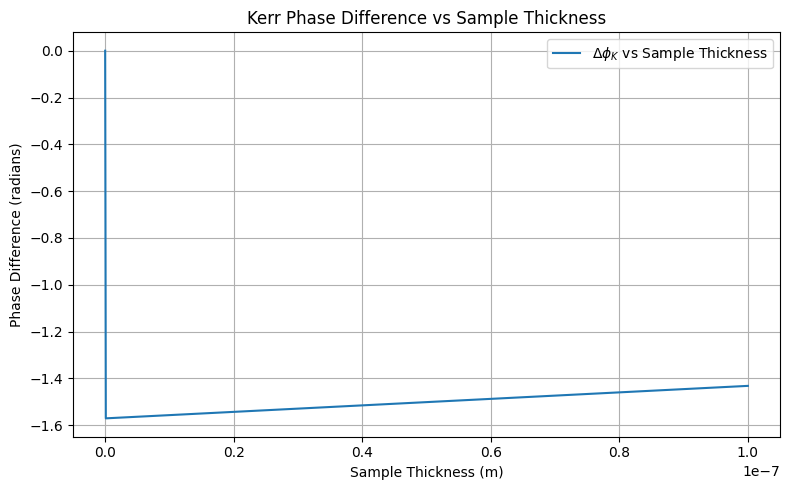

In [2]:
# This is the relation of rotation and sample thickness.
import numpy as np
import matplotlib.pyplot as plt

k0 = 2 * np.pi * 1e4 / 3  # The frequency is 1THz.
n1 = 3.46
n2 = 10.0
n3 = 1.0
d = 1e-8
a = 7.29735e-3
sigma_xy_b = -0.5
sigma_xy_t = 0.5
sigma_xx_b = 0.0005
sigma_xx_t = 0.0005
theta = 0

d_range = np.linspace(0, 1e-7, 1000)
theta_F_real_list = []
theta_F_imag_list = []
phase_diff_f_list = []
theta_K_real_list = []
theta_K_imag_list = []
phase_diff_k_list = []

for d in d_range:
    x1 = np.sqrt(n1**2 - n3**2 * np.sin(theta)**2) / n1
    x2 = np.sqrt(n2**2 - n3**2 * np.sin(theta)**2) / n2
    x3 = np.cos(theta)
    x4 = 2 * a * sigma_xx_b
    x5 = 2 * a * sigma_xy_b
    x6 = 2 * a * sigma_xy_t
    x7 = (n1 * x2 + n2 * x1 + x4 * x1 * x2) * (n1 * x1 + n2 * x2 + x4) + x5**2 * x1 * x2
    x9 = 2 * a * sigma_xx_t
    x8 = (n2 * x3 + n3 * x2 + x9 * x2 * x3) * (n2 * x2 + n3 * x3 + x9) + x6**2 * x2 * x3

    T12 = np.array([
        [2 * n1 * x1 * (n1 * x2 + n2 * x1 + x4 * x1 * x2) / x7, -2 * n1 * x2 * x5 / x7],
        [2 * n1 * x1**2 * x2 * x5 / x7, 2 * n1 * x2 * (n1 * x1 + n2 * x2 + x4) / x7]
    ])

    T21 = np.array([
        [2 * n2 * x2 * (n2 * x1 + n1 * x2 + x4 * x1 * x2) / x7, -2 * n2 * x1 * x5 / x7],
        [2 * n2 * x2**2 * x1 * x5 / x7, 2 * n2 * x1 * (n2 * x2 + n1 * x1 + x4) / x7]
    ])

    R12 = np.array([
        [2 * n1 * x1 * (n1 * x2 + n2 * x1 + x4 * x1 * x2) / x7 - 1, -2 * n1 * x2 * x5 / x7],
        [2 * n1 * x1**2 * x2 * x5 / x7, 2 * n1 * x2 * (n1 * x1 + n2 * x2 + x4) / x7 - 1]
    ])

    R21 = np.array([
        [2 * n2 * x2 * (n2 * x1 + n1 * x2 + x4 * x1 * x2) / x7 - 1, -2 * n2 * x1 * x5 / x7],
        [2 * n2 * x2**2 * x1 * x5 / x7, 2 * n2 * x1 * (n2 * x2 + n1 * x1 + x4) / x7 - 1]
    ])

    T23 = np.array([
        [2 * n2 * x2 * (n2 * x3 + n3 * x2 + x9 * x2 * x3) / x8, -2 * n2 * x3 * x6 / x8],
        [2 * n2 * x2**2 * x3 * x6 / x8, 2 * n2 * x3 * (n2 * x2 + n3 * x3 + x9) / x8]
    ])

    R23 = np.array([
        [2 * n2 * x2 * (n2 * x3 + n3 * x2 + x9 * x2 * x3) / x8 - 1, -2 * n2 * x3 * x6 / x8],
        [2 * n2 * x2**2 * x3 * x6 / x8, 2 * n2 * x3 * (n2 * x2 + n3 * x3 + x9) / x8 - 1]
    ])

    delta = k0 * d * x2 * n2
    exp_2idelta = np.exp(-2j * delta)

    E_incident = np.array([1.0, 0.0])
    I = np.eye(2)
    inverse_term = np.linalg.inv(I - exp_2idelta * R21 @ R23)
    E_f = T23 @ inverse_term @ T12 @ E_incident
    E_k = (R12 + T21 @ R23 @ (exp_2idelta * inverse_term) @ T12) @ E_incident

    theta_F_real = np.arctan(E_f[1] / (E_f[0] * x3)).real
    theta_F_imag = np.arctan(E_f[1] / (E_f[0] * x3)).imag
    phase_diff_f = np.arctan((E_f[1] / (E_f[0] * x3)).imag / (E_f[1] / (E_f[0] * x3)).real)
    theta_F_real_list.append(theta_F_real)
    theta_F_imag_list.append(theta_F_imag)
    phase_diff_f_list.append(phase_diff_f)
    theta_K_real = np.arctan(E_k[1] / (E_k[0] * x1)).real
    theta_K_imag = np.arctan(E_k[1] / (E_k[0] * x1)).imag
    phase_diff_k = np.arctan((E_k[1] / (E_k[0] * x1)).imag / (E_k[1] / (E_k[0] * x1)).real)
    theta_K_real_list.append(theta_K_real)
    theta_K_imag_list.append(theta_K_imag)
    phase_diff_k_list.append(phase_diff_k)

plt.figure(figsize=(8, 5))
plt.plot(d_range, theta_F_real_list, label=r'$\Re\theta_F$ vs Sample Thickness')
plt.xlabel("Sample Thickness (m))")
plt.ylabel("Faraday Rotation Angle θ_F (radians)")
plt.title("Faraday Rotation Angle vs Sample Thickness")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(d_range, theta_F_imag_list, label=r'$\Im\theta_F$ vs Sample Thickness')
plt.xlabel("sample thickness (m)")
plt.ylabel("Faraday Rotation Angle θ_F (radians)")
plt.title("Faraday Rotation Angle vs Sample Thickness")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(d_range, phase_diff_f_list, label=r'$\Delta\phi_F$ vs Sample Thickness')
plt.xlabel("sample thickness (m)")
plt.ylabel("Phase Difference (radians)")
plt.title("Faraday Phase Difference vs Sample Thickness")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(d_range, theta_K_real_list, label=r'$\Re\theta_K$ vs Sample Thickness')
plt.xlabel("Sample Thickness (m)")
plt.ylabel("Kerr Rotation Angle θ_K (radians)")
plt.title("Kerr Rotation Angle vs Sample Thickness")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(d_range, theta_K_imag_list, label=r'$\Im\theta_K$ vs Sample Thickness')
plt.xlabel("Sample Thickness (m)")
plt.ylabel("Kerr Rotation Angle θ_K (radians)")
plt.title("Kerr Rotation Angle vs Sample Thickness")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(d_range, phase_diff_k_list, label=r'$\Delta\phi_K$ vs Sample Thickness')
plt.xlabel("Sample Thickness (m)")
plt.ylabel("Phase Difference (radians)")
plt.title("Kerr Phase Difference vs Sample Thickness")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

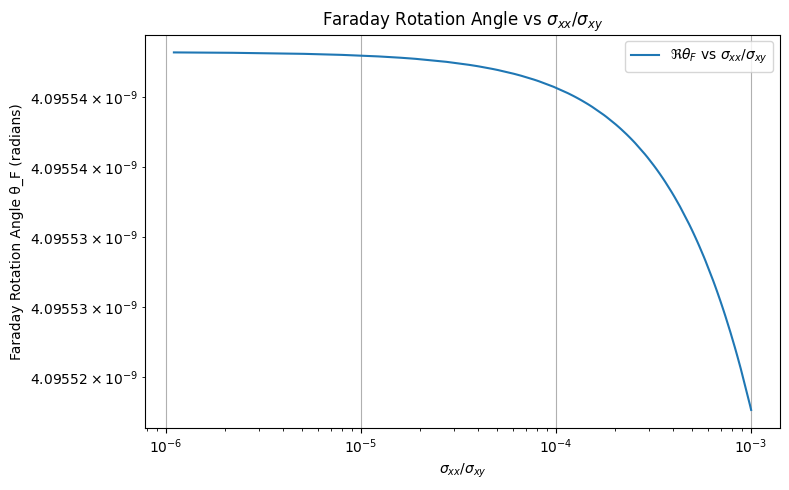

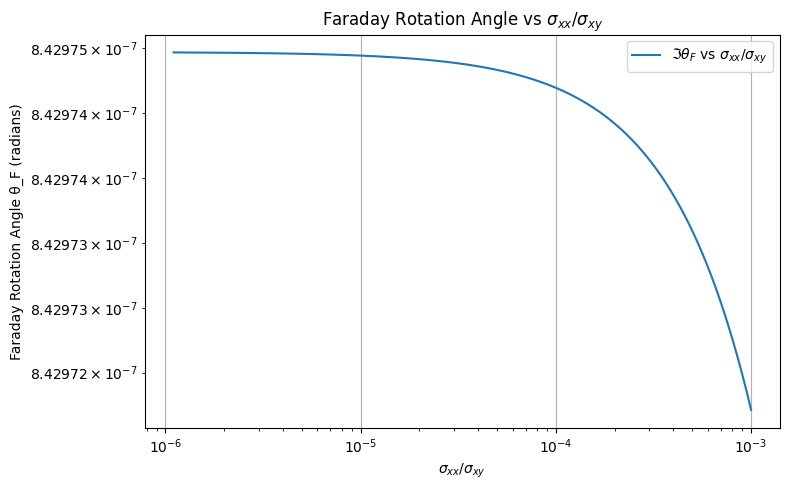

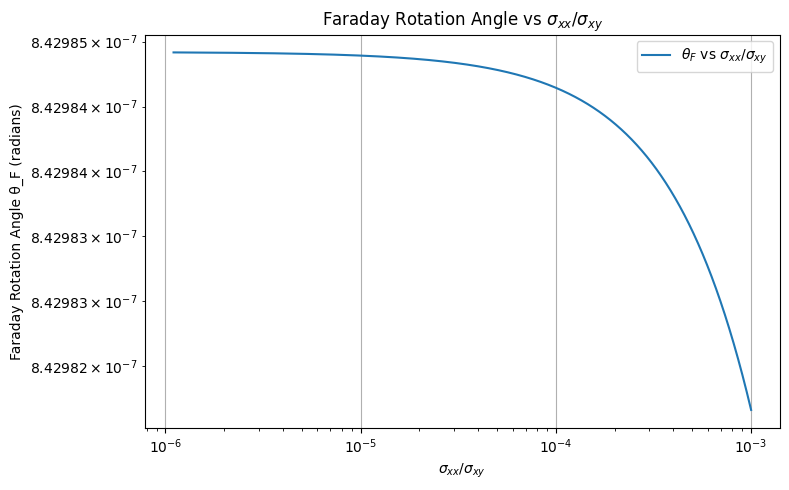

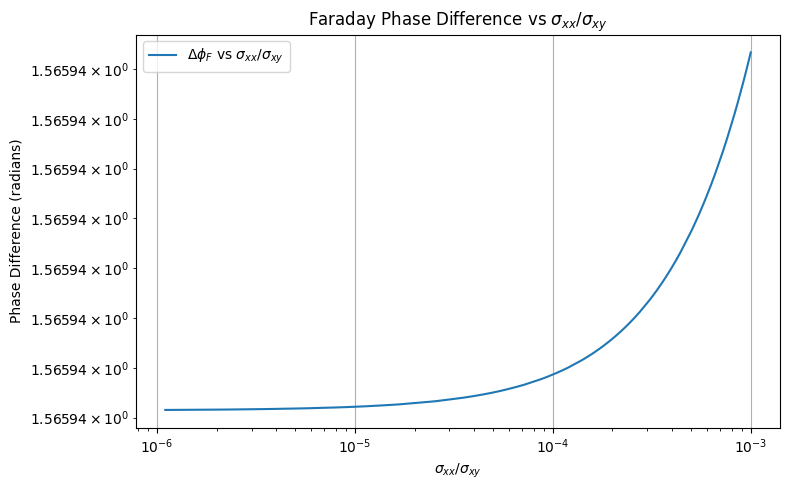

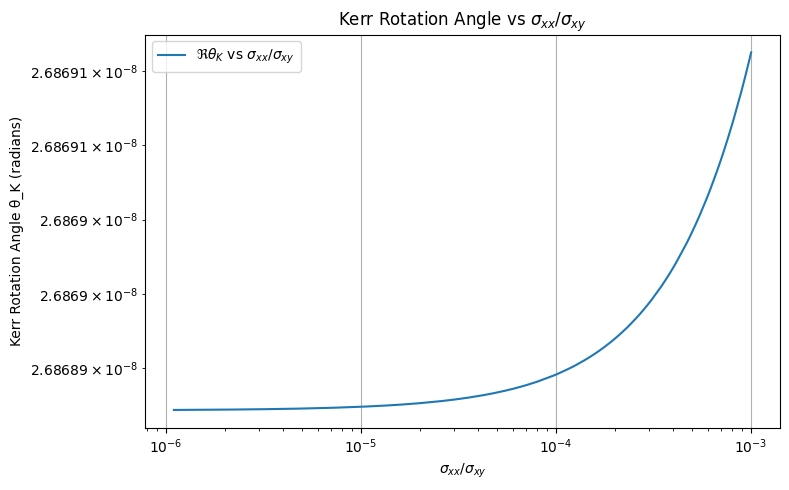

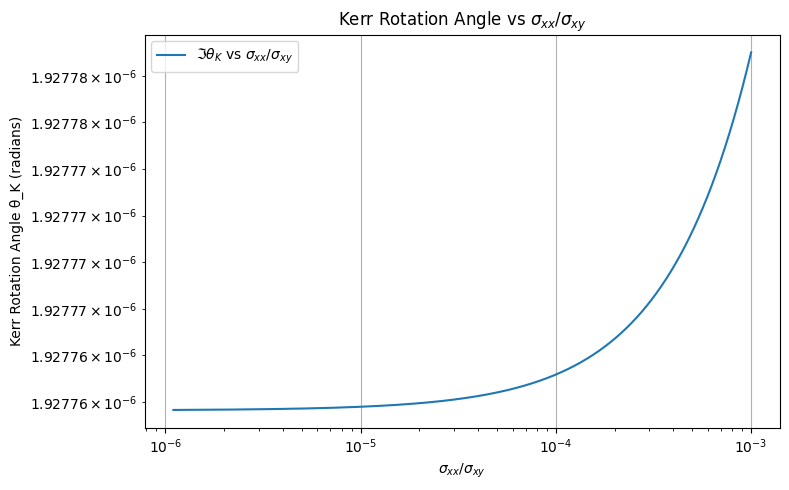

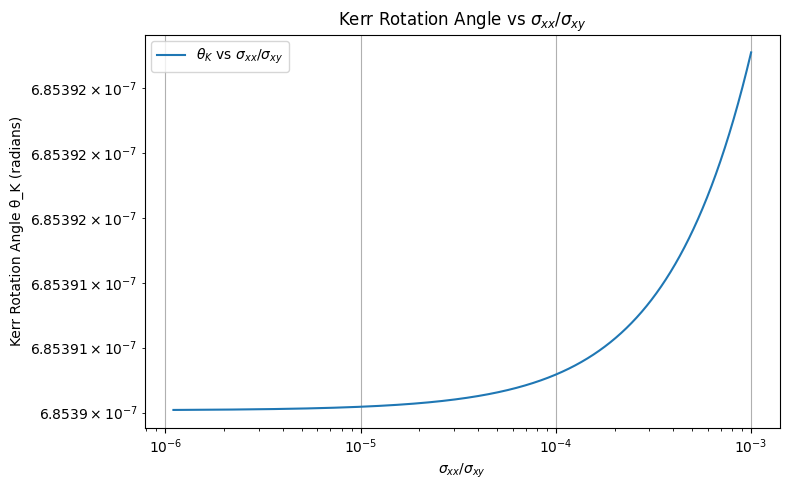

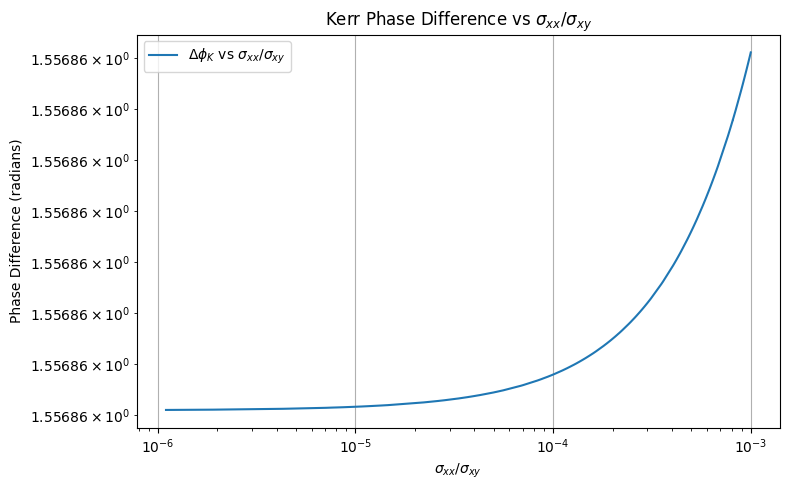

In [12]:
# This is the relation of rotation and $\sigma_{xx}$.
import numpy as np
import matplotlib.pyplot as plt
import warnings

k0 = 2 * np.pi * 1e4 / 3  # The frequency is 1THz.
n1 = 3.46
n2 = 10.0
n3 = 1.0
d = 1e-8
a = 7.29735e-3
sigma_xy_b = 0.5
sigma_xy_t = -0.5
theta = 0

sigma_range = np.linspace(1e-6, 1e-3, 10000)
theta_F_real_list = []
theta_F_imag_list = []
theta_F_total_list = []
phase_diff_f_list = []
theta_K_real_list = []
theta_K_imag_list = []
theta_K_total_list = []
phase_diff_k_list = []

for sigma in sigma_range:
    sigma_xx_b = sigma * sigma_xy_b
    sigma_xx_t = sigma * sigma_xy_b
    x1 = np.sqrt(n1**2 - n3**2 * np.sin(theta)**2) / n1
    x2 = np.sqrt(n2**2 - n3**2 * np.sin(theta)**2) / n2
    x3 = np.cos(theta)
    x4 = 2 * a * sigma_xx_b
    x5 = 2 * a * sigma_xy_b
    x6 = 2 * a * sigma_xy_t
    x7 = (n1 * x2 + n2 * x1 + x4 * x1 * x2) * (n1 * x1 + n2 * x2 + x4) + x5**2 * x1 * x2
    x9 = 2 * a * sigma_xx_t
    x8 = (n2 * x3 + n3 * x2 + x9 * x2 * x3) * (n2 * x2 + n3 * x3 + x9) + x6**2 * x2 * x3

    T12 = np.array([
        [2 * n1 * x1 * (n1 * x2 + n2 * x1 + x4 * x1 * x2) / x7, -2 * n1 * x2 * x5 / x7],
        [2 * n1 * x1**2 * x2 * x5 / x7, 2 * n1 * x2 * (n1 * x1 + n2 * x2 + x4) / x7]
    ])

    T21 = np.array([
        [2 * n2 * x2 * (n2 * x1 + n1 * x2 + x4 * x1 * x2) / x7, -2 * n2 * x1 * x5 / x7],
        [2 * n2 * x2**2 * x1 * x5 / x7, 2 * n2 * x1 * (n2 * x2 + n1 * x1 + x4) / x7]
    ])

    R12 = np.array([
        [2 * n1 * x1 * (n1 * x2 + n2 * x1 + x4 * x1 * x2) / x7 - 1, -2 * n1 * x2 * x5 / x7],
        [2 * n1 * x1**2 * x2 * x5 / x7, 2 * n1 * x2 * (n1 * x1 + n2 * x2 + x4) / x7 - 1]
    ])

    R21 = np.array([
        [2 * n2 * x2 * (n2 * x1 + n1 * x2 + x4 * x1 * x2) / x7 - 1, -2 * n2 * x1 * x5 / x7],
        [2 * n2 * x2**2 * x1 * x5 / x7, 2 * n2 * x1 * (n2 * x2 + n1 * x1 + x4) / x7 - 1]
    ])

    T23 = np.array([
        [2 * n2 * x2 * (n2 * x3 + n3 * x2 + x9 * x2 * x3) / x8, -2 * n2 * x3 * x6 / x8],
        [2 * n2 * x2**2 * x3 * x6 / x8, 2 * n2 * x3 * (n2 * x2 + n3 * x3 + x9) / x8]
    ])

    R23 = np.array([
        [2 * n2 * x2 * (n2 * x3 + n3 * x2 + x9 * x2 * x3) / x8 - 1, -2 * n2 * x3 * x6 / x8],
        [2 * n2 * x2**2 * x3 * x6 / x8, 2 * n2 * x3 * (n2 * x2 + n3 * x3 + x9) / x8 - 1]
    ])

    delta = k0 * d * x2 * n2
    exp_2idelta = np.exp(-2j * delta)

    E_incident = np.array([1.0, 0.0 * x1])
    I = np.eye(2)
    inverse_term = np.linalg.inv(I - exp_2idelta * R21 @ R23)
    E_f = T23 @ inverse_term @ T12 @ E_incident
    E_k = (R12 + T21 @ R23 @ (exp_2idelta * inverse_term) @ T12) @ E_incident

    theta_F_real = -np.arctan(E_f[1] / (E_f[0] * x3)).real
    theta_F_imag = -np.arctan(E_f[1] / (E_f[0] * x3)).imag
    phase_diff_f = np.arctan((E_f[1] / (E_f[0] * x3)).imag / ((E_f[1] / (E_f[0] * x3)).real))
    theta_F_real_list.append(theta_F_real)
    theta_F_imag_list.append(theta_F_imag)
    theta_F_total_list.append(abs(np.arctan(E_f[1] / (E_f[0] * x3))))
    phase_diff_f_list.append(phase_diff_f)
    theta_K_real = -np.arctan(E_k[1] / (E_k[0] * x1)).real
    theta_K_imag = np.arctan(E_k[1] / (E_k[0] * x1)).imag
    phase_diff_k = -np.arctan((E_k[1] / (E_k[0] * x1)).imag / ((E_k[1] / (E_k[0] * x1)).real))
    theta_K_real_list.append(theta_K_real)
    theta_K_imag_list.append(theta_K_imag)
    theta_K_total_list.append(abs(np.arctan(E_k[1] / (E_f[0] * x1))))
    phase_diff_k_list.append(phase_diff_k)

sigma_range = sigma_range[1:]
theta_F_real_list = theta_F_real_list[1:]
theta_F_imag_list = theta_F_imag_list[1:]
theta_F_total_list = theta_F_total_list[1:]
phase_diff_f_list = phase_diff_f_list[1:]
theta_K_real_list = theta_K_real_list[1:]
theta_K_imag_list = theta_K_imag_list[1:]
theta_K_total_list = theta_K_total_list[1:]
phase_diff_k_list = phase_diff_k_list[1:]

plt.figure(figsize=(8, 5))
plt.loglog(sigma_range, theta_F_real_list, label=r'$\Re\theta_F$ vs $\sigma_{xx}/\sigma_{xy}$')
plt.xlabel("$\sigma_{xx}/\sigma_{xy}$")
plt.ylabel("Faraday Rotation Angle θ_F (radians)")
plt.title("Faraday Rotation Angle vs $\sigma_{xx}/\sigma_{xy}$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.loglog(sigma_range, theta_F_imag_list, label=r'$\Im\theta_F$ vs $\sigma_{xx}/\sigma_{xy}$')
plt.xlabel("$\sigma_{xx}/\sigma_{xy}$")
plt.ylabel("Faraday Rotation Angle θ_F (radians)")
plt.title("Faraday Rotation Angle vs $\sigma_{xx}/\sigma_{xy}$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.loglog(sigma_range, theta_F_total_list, label=r'$\theta_F$ vs $\sigma_{xx}/\sigma_{xy}$')
plt.xlabel("$\sigma_{xx}/\sigma_{xy}$")
plt.ylabel("Faraday Rotation Angle θ_F (radians)")
plt.title("Faraday Rotation Angle vs $\sigma_{xx}/\sigma_{xy}$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.loglog(sigma_range, phase_diff_f_list, label=r'$\Delta\phi_F$ vs $\sigma_{xx}/\sigma_{xy}$')
plt.xlabel("$\sigma_{xx}/\sigma_{xy}$")
plt.ylabel("Phase Difference (radians)")
plt.title("Faraday Phase Difference vs $\sigma_{xx}/\sigma_{xy}$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.loglog(sigma_range, theta_K_real_list, label=r'$\Re\theta_K$ vs $\sigma_{xx}/\sigma_{xy}$')
plt.xlabel("$\sigma_{xx}/\sigma_{xy}$")
plt.ylabel("Kerr Rotation Angle θ_K (radians)")
plt.title("Kerr Rotation Angle vs $\sigma_{xx}/\sigma_{xy}$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.loglog(sigma_range, theta_K_imag_list, label=r'$\Im\theta_K$ vs $\sigma_{xx}/\sigma_{xy}$')
plt.xlabel("$\sigma_{xx}/\sigma_{xy}$")
plt.ylabel("Kerr Rotation Angle θ_K (radians)")
plt.title("Kerr Rotation Angle vs $\sigma_{xx}/\sigma_{xy}$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.loglog(sigma_range, theta_K_total_list, label=r'$\theta_K$ vs $\sigma_{xx}/\sigma_{xy}$')
plt.xlabel("$\sigma_{xx}/\sigma_{xy}$")
plt.ylabel("Kerr Rotation Angle θ_K (radians)")
plt.title("Kerr Rotation Angle vs $\sigma_{xx}/\sigma_{xy}$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.loglog(sigma_range, phase_diff_k_list, label=r'$\Delta\phi_K$ vs $\sigma_{xx}/\sigma_{xy}$')
plt.xlabel("$\sigma_{xx}/\sigma_{xy}$")
plt.ylabel("Phase Difference (radians)")
plt.title("Kerr Phase Difference vs $\sigma_{xx}/\sigma_{xy}$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

warnings.filterwarnings('ignore')